In [1]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.gamma_ray_parameters import energy_res_comptel
from hazma.scalar_mediator import HiggsPortal, ScalarMediator
from hazma.vector_mediator import KineticMixing, VectorMediator
from utilities import colors, latex_text_width_1col

/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/positron_spectra.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  from hazma.positron_helper_functions import positron_charged_pion, positron_muon


In [2]:
hp = HiggsPortal(300., 300., gsxx=1.0, stheta=1e-1)

hp.dnde_pos_ss(np.array([1.0, 10.0, 100.0]), 1000.0)

/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/scalar_mediator/_scalar_mediator_positron_spectra.py:30: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return 2.0 * dnde_decay_s(e_ps, e_s, self.ms, pw_array, "total")
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/scalar_mediator/_scalar_mediator_positron_spectra.py:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 2.0 * dnde_decay_s(e_ps, e_s, self.ms, pw_array, "total")


array([       nan, 0.01939192, 0.01887641])

**Plots $e^+$ annihilation spectra for the scalar and vector models for annihilation into mediators.**

In [4]:
# Dark matter masses
mxs = np.array([100., 250., 600.])
# Mediator masses
mMs = np.array([10., 225., 300.])
# List of models. The top row of the plot will contain the Higgs portal model
# spectra, the bottom the heavy quark model spectra.
models = [
    HiggsPortal(1., 1., gsxx=1.0, stheta=1e-1),
    KineticMixing(1., 1., gvxx=1.0, eps=0.1),
]

# Approximate Milky Way velocity dispersion, used to compute the DM
# center of mass energy
vx_mw = 1e-3

# Photon energies
e_p_min, e_p_max = 0.1, 1000.0
e_ps = np.geomspace(e_p_min, e_p_max, 250)

# Plot dimensions
n_subplot_rows, n_subplot_cols = len(models), len(mxs)

# Color map for mediator masses
def cmap(mM):
    return colors[np.where(mMs == mM)[0][0]]

/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/positron_spectra.py:33: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return positron_muon.Spectrum(eng_p, eng_mu)
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/positron_spectra.py:55: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return positron_charged_pion.Spectrum(eng_p, eng_pi)
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/positron_spectra.py:55: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from spl

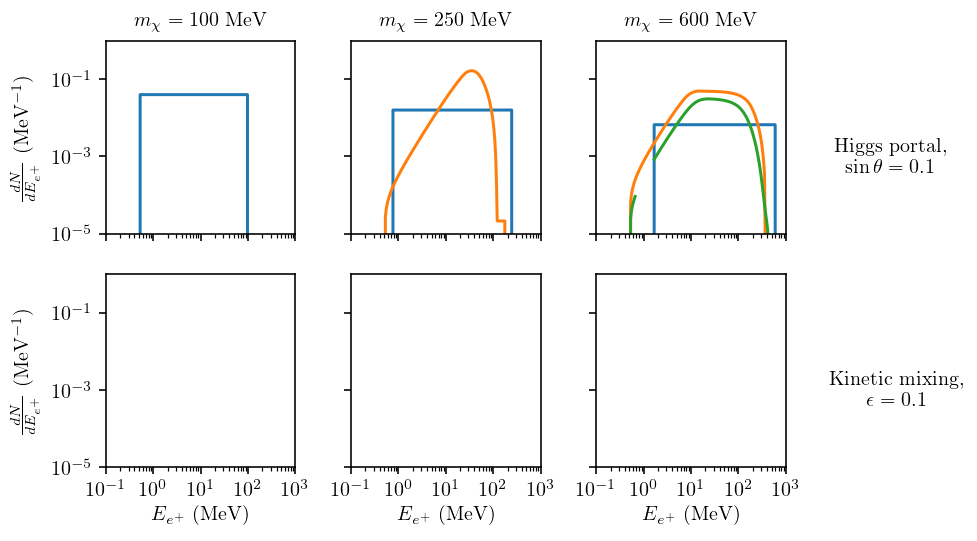

In [5]:
fig, axes = plt.subplots(
    n_subplot_rows,
    n_subplot_cols,
    sharex=True,
    sharey=True,
    figsize=(latex_text_width_1col, 0.55 * latex_text_width_1col),
)

for row in range(n_subplot_rows):  # loop over type of model
    for col in range(n_subplot_cols):  # loop over DM masses
        ax = axes[row, col]

        # Get the model and set DM mass to column's value
        model = models[row]
        model.mx = mxs[col]
        # DM center of mass energy
        e_cm = 2.0 * model.mx * (1.0 + 0.5 * vx_mw ** 2)
        
        # Loop over mediator masses
        for mM in mMs:
            if mM <= e_cm / 2:
                if isinstance(model, ScalarMediator):
                    model.ms = mM
                    fs = "s s"
                elif isinstance(model, VectorMediator):
                    model.mv = mM
                    fs = "v v"

                # Compute e+ spectrum for annihilation to mediators
                ax.loglog(e_ps, model.positron_spectra(e_ps, e_cm)[fs],
                          color=cmap(mM))

        # Formatting: label mediator masses
#         for mM, (x, y) in mM_labels[row, col].items():
#             ax.text(x, y, r"%i MeV" % mM, fontsize=8, color=cmap(mM))
    break

# Formatting
for row in range(n_subplot_rows):
    axes[row, 0].set_ylabel(r"$\frac{dN}{dE_{e^+}}$ (MeV$^{-1}$)")
    axes[row, 0].set_ylim(1e-5, 1e0)

for col in range(n_subplot_cols):
    axes[0, col].set_title(r"$m_\chi = %i$ MeV" % mxs[col], fontsize=10)
    axes[-1, col].set_xlabel(r"$E_{e^+}$ (MeV)")
    axes[-1, col].set_xlim(e_p_min, e_p_max)

axes[0, -1].text(
    1.6e5,
    1e-3,
    "Higgs portal,\n" + r"$\sin\theta = 0.1$",
    ha="center",
    va="center",
    fontsize=10,
)
axes[1, -1].text(
    2.1e5,
    1e-3,
    "Kinetic mixing,\n" + r"$\epsilon = 0.1$",
    ha="center",
    va="center",
    fontsize=10,
)

fig.tight_layout()
# fig.savefig("figures/positron_spectra_ann_to_med.pdf", bbox_inches="tight")
plt.show()

## New

In [7]:
# Dark matter masses
mxs = np.array([100., 200., 300., 400.])
# Mediator masses
mss = np.array([1.,  50., 100., 150., 200., 250., 300., 400.])
# List of models. The top row of the plot will contain the Higgs portal model
# spectra, the bottom the heavy quark model spectra.
sms = [HiggsPortal(1., 1., gsxx=1., stheta=1e-1),
       HeavyQuark(1., 1., gsxx=1., gsQ=1e-1, mQ=1e3, QQ=1.)]

# Approximate Milky Way velocity dispersion, used to compute the DM
# center of mass energy
vx_mw = 1e-3

# Photon energies
e_gam_min, e_gam_max = 5., 600.
e_gams = np.geomspace(e_gam_min, e_gam_max, 250)

# Plot dimensions
n_subplot_rows, n_subplot_cols = len(sms), len(mxs)


# Color map for mediator masses
def cmap(ms):
    return colors[np.where(mss == ms)[0][0]]


# Label positions for mediator masses
ms_labels = np.array([
    [{1: (1.1e2, 5e-2), 50: (1.3e1, 3e-3), 100: (6e0, 1e-2)},
     {150: (2.5e1, 4.2e-3), 200: (1.2e1, 1.2e-4)},
     {250: (7e0, 1.15e-4), 300: (5.5e0, 4e-2)},
     {400: (2.5e1, 4.2e-2)}],
    [{}, {}, {}, {}]
])

NameError: name 'model' is not defined

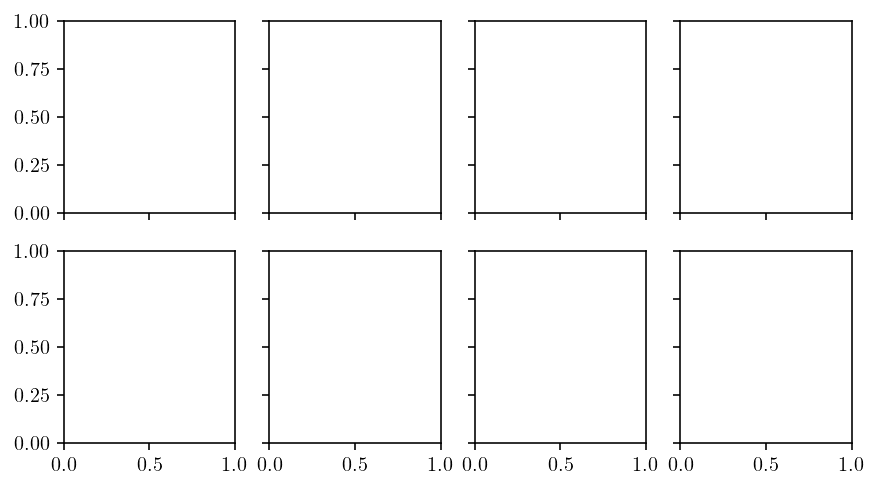

In [8]:
fig, axes = plt.subplots(
    n_subplot_rows,
    n_subplot_cols,
    sharex=True,
    sharey=True,
    figsize=(latex_text_width_1col, 0.55 * latex_text_width_1col))

for row in range(n_subplot_rows):  # loop over type of model
    for col in range(n_subplot_cols):  # loop over DM masses
        ax = axes[row, col]

        # Get the model and set DM mass to column's value
        sm = sms[row]
        sm.mx = mxs[col]
        # DM center of mass energy
        e_cm = 2. * sm.mx * (1. + 0.5 * vx_mw**2)

        # Get function to compute total convolved spectrum
        dnde_det_fn = model.total_conv_positron_spectrum_fn(
            e_p_min, e_p_max, e_cm, energy_res=energy_res_comptel
        )
        # Evaluate and plot
        ax.loglog(e_ps, dnde_det_fn(e_ps), "k")

        # Plot individual channels' continuum spectra
        for fs, spec in model.positron_spectra(e_ps, e_cm).items():
            if fs != "total":
                ax.loglog(
                    e_ps,
                    spec,
                    color=get_color(fs),
                    linewidth=1,
                    label=get_tex_label(fs),
                )

        # Compute line energies
        for fs, line_info in model.positron_lines(e_cm).items():
            ax.axvline(
                line_info["energy"], linestyle="--", color="k", alpha=0.5, linewidth=1.5
            )

        # Formatting: label final states
#         for fs, (x, y) in fs_labels[row, col].items():
#             ax.text(x, y, get_tex_label(fs), fontsize=10, color=get_color(fs))

# Formatting
for row in range(n_subplot_rows):
    axes[row, 0].set_ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
#     axes[row, 0].set_ylim(1e-4, 1e-1)

for col in range(n_subplot_cols):
#     axes[0, col].set_title(r"$m_\chi = %i$ MeV" % mxs[col], fontsize=10)
    axes[-1, col].set_xlabel(r"$E_\gamma$ (MeV)")
#     axes[-1, col].set_xlim(e_gam_min, e_gam_max)

# axes[0, -1].text(900, 4e-3, r"$\sin\theta = 0.1$", va="center", fontsize=10)
# axes[1, -1].text(900, 4e-3, r"$g_{S\Psi} = 0.1$" + "\n" + r"$Q_\Psi = 1$" +
#                  "\n" + r"$m_\Psi = 1$ GeV", va="center", fontsize=10)

fig.tight_layout()
# fig.savefig("figures/positron_spectra_ann_to_med.pdf", bbox_inches="tight")
# plt.show()